**Vamos experimentar agora o algoritmo Random Forest?**

Veja: Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.

In [34]:
!pip -q install yellowbrick

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier

In [64]:
import pickle
with open('/content/sample_data/iris.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [65]:
modelo = RandomForestClassifier(n_estimators=10, max_features=3, criterion='gini', random_state = 0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(max_features=3, n_estimators=10, random_state=0)



> **Vamos testar o modelo?**



In [58]:
previsoes = modelo.predict(X_teste)

In [59]:
previsoes

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)



> **Será se o modelo acertou?**



In [60]:
y_teste

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

1.0

In [53]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

0.9666666666666667

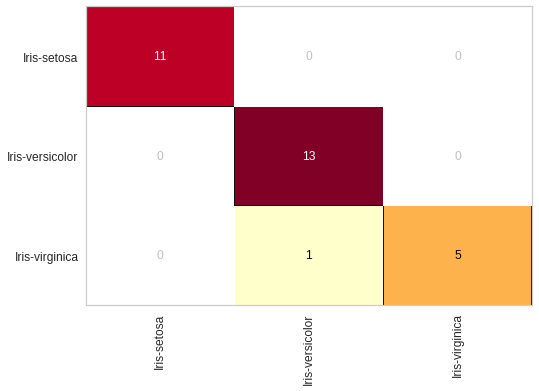

In [54]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [55]:
print(classification_report(y_teste, previsoes))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



**Vamos ver os atributos que o Random considerou como mais importantes?**

In [67]:
print(modelo.feature_importances_) 

[0.01160119 0.00721406 0.30342893 0.67775582]


**Vamos agora analisar como estes dados estão distribuídos?**

In [74]:
Base = pd.read_csv('/content/sample_data/iris.csv', ',')

In [77]:
Base

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [80]:
Base['petallength'].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petallength, dtype: float64

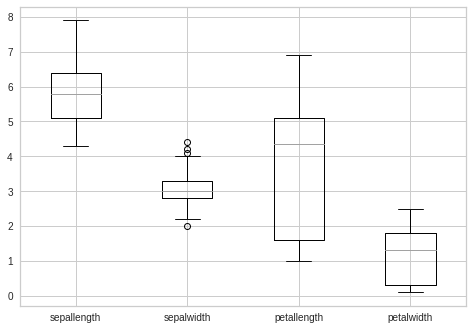

In [79]:
import matplotlib.pyplot as plt
Base.boxplot(column=['sepallength','sepalwidth','petallength','petalwidth'])

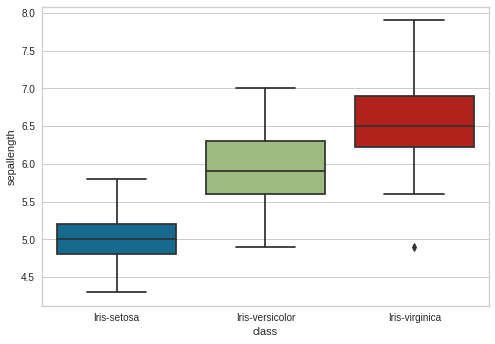

In [83]:
sns.boxplot(data=Base,x="class", y="sepallength")

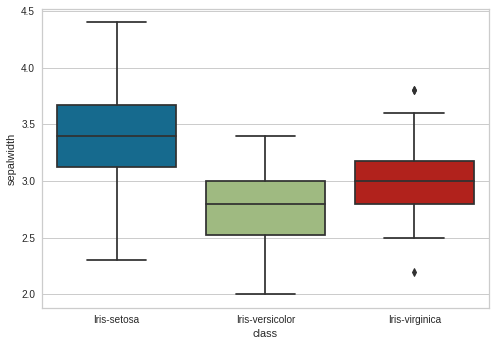

In [84]:
sns.boxplot(data=Base,x="class", y="sepalwidth")

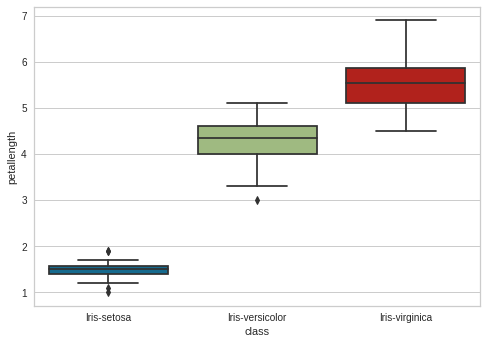

In [86]:
sns.boxplot(data=Base,x="class", y="petallength")

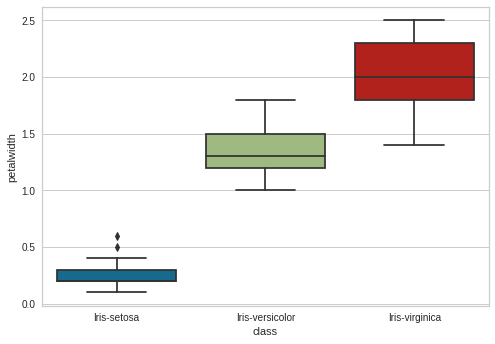

In [88]:
sns.boxplot(data=Base,x="class", y="petalwidth")